<a href="https://www.kaggle.com/code/suyashkapil/skin-cancer-classification-cnn?scriptVersionId=119482299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***Skin Cancer Classification using Convolutional Neural Network***

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import PIL.Image as img
from keras.layers import Dense, Conv2D , MaxPool2D , Dropout , Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental import preprocessing

# **Importing Dataset**

In [2]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv')
data_rescale = data/255
data_rescale

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,0.662745,0.670588,0.666667,0.694118,0.709804,0.713725,0.709804,0.725490,0.760784,0.752941,...,0.721569,0.729412,0.725490,0.705882,0.615686,0.549020,0.549020,0.623529,0.647059,0.007843
1,0.074510,0.223529,0.411765,0.549020,0.584314,0.580392,0.564706,0.607843,0.666667,0.666667,...,0.674510,0.686275,0.627451,0.564706,0.447059,0.349020,0.184314,0.070588,0.070588,0.007843
2,0.607843,0.639216,0.631373,0.654902,0.654902,0.674510,0.607843,0.596078,0.647059,0.686275,...,0.639216,0.698039,0.615686,0.650980,0.654902,0.580392,0.552941,0.533333,0.450980,0.007843
3,0.098039,0.278431,0.454902,0.545098,0.533333,0.600000,0.580392,0.631373,0.674510,0.635294,...,0.490196,0.529412,0.541176,0.537255,0.435294,0.278431,0.125490,0.062745,0.062745,0.007843
4,0.505882,0.635294,0.709804,0.768627,0.803922,0.815686,0.803922,0.835294,0.882353,0.878431,...,0.823529,0.772549,0.674510,0.745098,0.764706,0.756863,0.709804,0.576471,0.345098,0.007843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.674510,0.670588,0.678431,0.686275,0.643137,0.733333,0.811765,0.823529,0.815686,0.807843,...,0.823529,0.850980,0.866667,0.819608,0.725490,0.733333,0.752941,0.752941,0.752941,0.000000
10011,0.007843,0.133333,0.423529,0.454902,0.447059,0.466667,0.513725,0.545098,0.545098,0.568627,...,0.678431,0.662745,0.658824,0.658824,0.560784,0.541176,0.325490,0.090196,0.011765,0.000000
10012,0.478431,0.603922,0.635294,0.666667,0.701961,0.772549,0.784314,0.764706,0.792157,0.780392,...,0.866667,0.843137,0.803922,0.733333,0.819608,0.776471,0.733333,0.643137,0.611765,0.000000
10013,0.537255,0.560784,0.552941,0.545098,0.576471,0.596078,0.607843,0.596078,0.607843,0.623529,...,0.674510,0.670588,0.686275,0.717647,0.694118,0.666667,0.662745,0.650980,0.666667,0.000000


In [3]:
data.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
count,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,147.070894,152.760459,157.600799,161.083974,164.170644,166.832252,168.773839,170.279780,171.318422,172.058213,...,167.020769,166.026460,164.834648,163.231453,160.781128,156.980829,152.397703,146.934398,141.265402,3.720919
std,48.203980,43.474167,38.849857,35.319100,31.777087,28.001220,25.836775,24.820715,24.149374,23.752983,...,24.519133,25.029717,25.826189,27.013780,29.412054,34.210474,39.703941,45.032512,49.148214,1.347499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,6.000000,8.000000,...,4.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,140.000000,144.000000,147.000000,150.000000,152.000000,154.000000,156.000000,157.000000,157.000000,...,152.000000,151.000000,149.000000,148.000000,146.000000,143.000000,139.000000,134.000000,128.000000,4.000000
50%,160.000000,163.000000,165.000000,166.000000,168.000000,169.000000,171.000000,172.000000,173.000000,173.000000,...,168.000000,167.000000,166.000000,165.000000,164.000000,162.000000,160.000000,157.000000,154.000000,4.000000
75%,177.000000,179.000000,181.000000,182.000000,184.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,183.000000,182.000000,181.000000,180.000000,179.000000,178.000000,176.000000,174.000000,172.000000,4.000000
max,247.000000,248.000000,252.000000,253.000000,255.000000,255.000000,254.000000,255.000000,255.000000,254.000000,...,254.000000,254.000000,252.000000,252.000000,253.000000,252.000000,254.000000,252.000000,251.000000,6.000000


In [4]:
data.groupby('label').count()['pixel0001']

label
0     327
1     514
2    1099
3     115
4    6705
5     142
6    1113
Name: pixel0001, dtype: int64

# Majority of the values are 4 while there are very less 5s and 3s.

In [5]:
data.isnull().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel0780    0
pixel0781    0
pixel0782    0
pixel0783    0
label        0
Length: 785, dtype: int64

No null values

# **First 8 images**

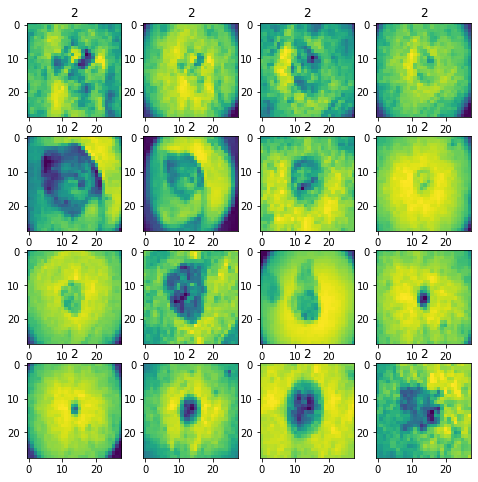

In [21]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(data_rescale.iloc[i,:784].values.reshape(28,28))
    plt.title(data.iloc[i,784])

# **Rescaling data**

In [7]:
x = data_rescale.iloc[:,0:784]
y = data_rescale['label']*255

# **Building a CNN**

In [8]:
EarlyStop = keras.callbacks.EarlyStopping(
               min_delta = 0.001,
               patience = 10 ,
               verbose = 0
)
model = keras.Sequential([
        preprocessing.RandomFlip('horizontal'),
        layers.Conv2D(20 , kernel_size =9),
        layers.MaxPool2D(pool_size=1),
        layers.Conv2D(16, kernel_size = 7),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(7, activation = 'relu'),
        layers.Dense(7,activation='softmax')
]
)
model.compile(
    optimizer ='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


2023-02-17 15:35:23.711315: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# **Grey-scale to RGB**

Text(0.5, 1.0, 'RGB')

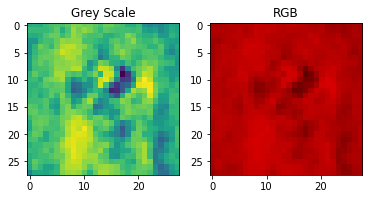

In [9]:
channel = np.zeros(784).transpose()
x3d = np.stack((x.iloc[0,:],channel,channel),axis=-1)
x3d1 = x3d.reshape(28,28,3)
plt.subplot(1,2,1)
plt.imshow(data_rescale.iloc[0,:784].values.reshape(28,28))
plt.title('Grey Scale')
plt.subplot(1,2,2)
plt.imshow(x3d1)
plt.title('RGB')

# **Train-test split and One hot encoding**

In [10]:
x_new = x.values.reshape(10015,28,28,1)
x_train , x_test , y_train ,y_test = train_test_split(x_new,y,test_size=0.2)
print(x_train.shape,
x_test.shape)
y_train1 = to_categorical(y_train, num_classes=7)
y_test1 = to_categorical(y_test, num_classes=7)

(8012, 28, 28, 1) (2003, 28, 28, 1)


# **Training the model**

2023-02-17 15:35:24.369610: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
8/8 [==============================] - 4s 348ms/step - loss: 1.7030 - accuracy: 0.3409 - val_loss: 1.8619 - val_accuracy: 0.0514
Epoch 2/100
8/8 [==============================] - 2s 304ms/step - loss: 1.4765 - accuracy: 0.4486 - val_loss: 1.8020 - val_accuracy: 0.0489
Epoch 3/100
8/8 [==============================] - 2s 302ms/step - loss: 1.4121 - accuracy: 0.4979 - val_loss: 1.7802 - val_accuracy: 0.0569
Epoch 4/100
8/8 [==============================] - 2s 311ms/step - loss: 1.3088 - accuracy: 0.5775 - val_loss: 1.5938 - val_accuracy: 0.3934
Epoch 5/100
8/8 [==============================] - 2s 305ms/step - loss: 1.2431 - accuracy: 0.6103 - val_loss: 1.3944 - val_accuracy: 0.6650
Epoch 6/100
8/8 [==============================] - 2s 312ms/step - loss: 1.2015 - accuracy: 0.6174 - val_loss: 1.4911 - val_accuracy: 0.6610
Epoch 7/100
8/8 [==============================] - 2s 305ms/step - loss: 1.1684 - accuracy: 0.6364 - val_loss: 1.4023 - val_accuracy: 0.6750
Epoch 8/100
8

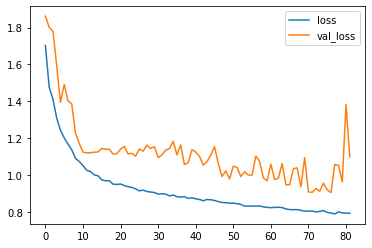

In [11]:
train = model.fit(x_train,
          y_train1,
          batch_size = 1024,
          epochs= 100,
          callbacks=[EarlyStop],
          validation_data=(x_test,y_test1) )
history_df = pd.DataFrame(train.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# **Predicting the values**

In [12]:
pred = model.predict(x_test)
pred1 = np.argmax(pred,axis=1)
pred1[0:100]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 6, 4, 4, 6, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 2, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])